# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Virdhi Dwi Ardiawan
- **Email:** vanardiawan179@gmail.com
- **ID Dicoding:** virdhiard

# Menentukan Pertanyaan Bisnis

1.   Bagaimana pengaruh hari kerja dan hari libur terhadap minat orang untuk menyewa sepeda?
2.   Bagaimana pengaruh musim dan waktu bulan terhadap minat pengguna untuk menyewa sepeda?
3.   Bagaimana indikator temperatur udara, humidity dan windspeed mempengaruhi seseorang untuk menyewa sepeda pada jam tertentu?

# Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dalam *project* ini kita menggunakan dua dataset untuk menganalisis fenomena-fenomena yang ada, yaitu dataset hour_dc dan day_df
- Dataset ini diambil dari situs kaggle dengan link : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

## Assessing Data

### Menilai tabel `day_df`

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
1. Dalam dataset day_df terdapat 731 data dan 16 kolom.
2. Dataset ini terdapat 3 tipe data yaitu float64 sebanyak 4 kolom, int64 sebanyak 11, object sebanyak 1 kolom.
3. Terdapat kesalahan pada kolom dteday yang harusnya "datetime" menjadi "object"
4. Dataset ini tidak terdapat adanya data yang kosong dan data yang kembar atau duplikat.
5. Jumlah sepeda yang terdata pada dataset ini adalah 8714 buah.

### Menilai tabel `hour_df`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
1. Dalam dataset hour_df terdapat 17379 data dan 17 kolom.
2. Dataset ini terdapat 3 tipe data yaitu float64 sebanyak 4 kolom, int64 sebanyak 12 kolom, object sebanyak 1 kolom.
3. Terdapat kesalahan pada kolom dteday yang harusnya "datetime" menjadi "object"
4. Dataset ini tidak terdapat adanya data yang kosong dan data yang kembar atau duplikat.
5. Jumlah sepeda yang terdata pada dataset ini adalah 977 buah.

## Cleaning Data

Membersihkan tabel `day_df`

Memperbaiki Tipe Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengatasi Outlier

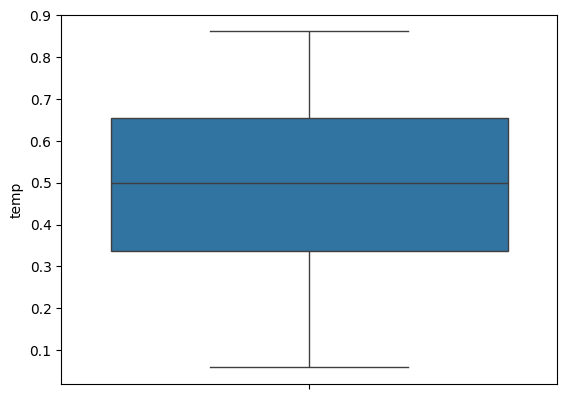

In [ ]:
sns.boxplot(day_df['temp'])
plt.show()

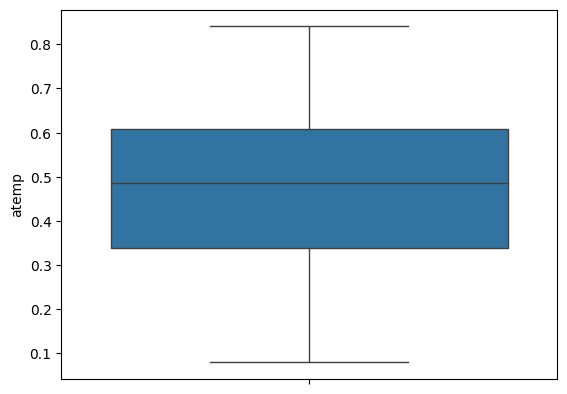

In [ ]:
sns.boxplot(day_df['atemp'])
plt.show()

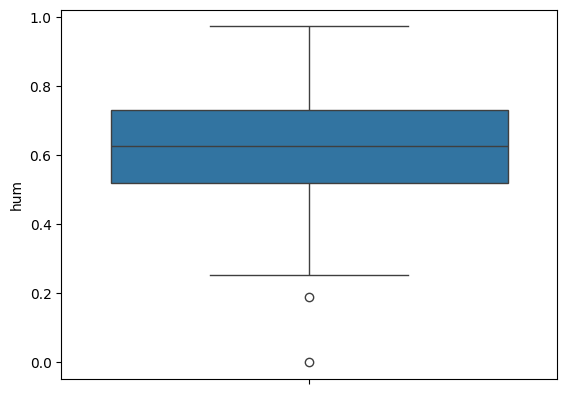

In [ ]:
sns.boxplot(day_df['hum'])
plt.show()

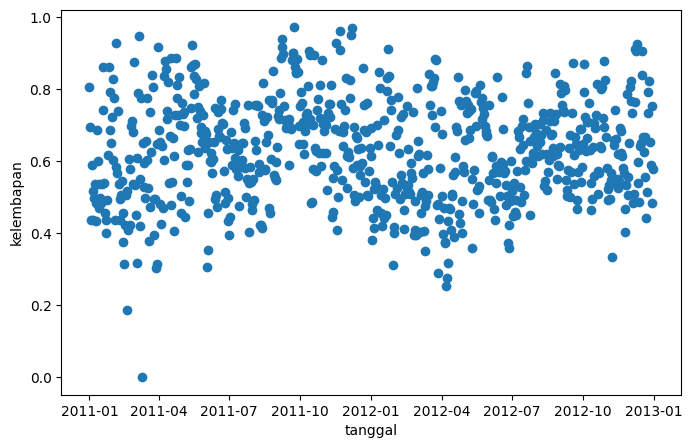

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(day_df['dteday'], day_df['hum'])
ax.set_xlabel('tanggal')
ax.set_ylabel('kelembapan')
plt.show()

In [ ]:
#Mengecek berapa banyak data outlier pada tabel day_df kolom "humidity"
day_df[day_df.hum <= 0.2]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


In [ ]:
#Menghapus data outlier pada tabel day_df kolom "humidity"
day_df = day_df.drop(day_df[day_df.hum <= 0.2].index)

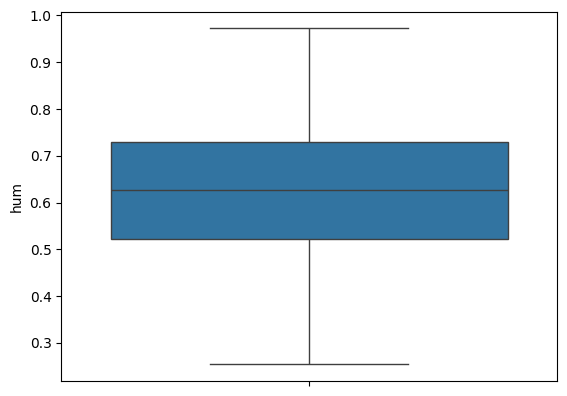

In [ ]:
#Mengecek kembali hasil dari menghapus data pada tabel day_df kolom "humidity"
sns.boxplot(day_df['hum'])
plt.show()

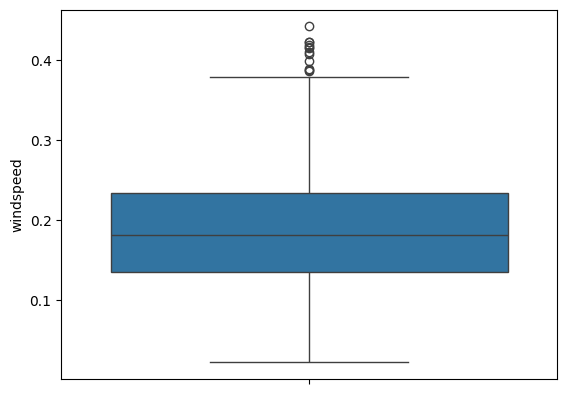

In [ ]:
sns.boxplot(day_df['windspeed'])
plt.show()

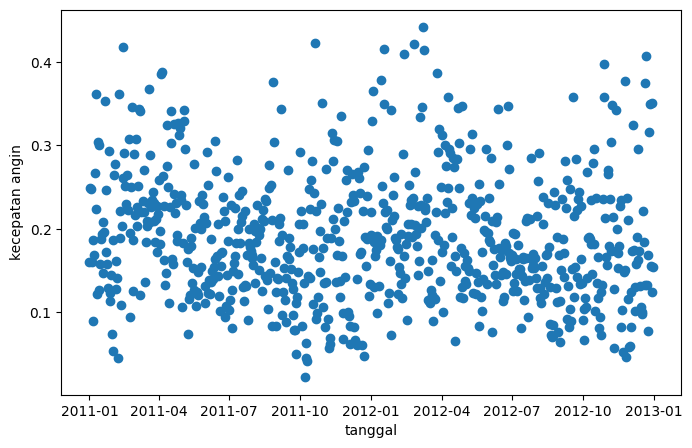

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(day_df['dteday'], day_df['windspeed'])
ax.set_xlabel('tanggal')
ax.set_ylabel('kecepatan angin')
plt.show()

In [ ]:
#Mengecek berapa banyak data outlier pada tabel day_df kolom "windspeed"
jumlah_outlier_day_windspeed = len(day_df[day_df.windspeed >= 0.38])
print('Jumlah outlier pada kolom windspeed:', jumlah_outlier_day_windspeed)

Jumlah outlier pada kolom windspeed: 12


In [ ]:
#Menghapus data outlier pada tabel day_df kolom "windspeed"
day_df = day_df.drop(day_df[day_df.windspeed >= 0.38].index)

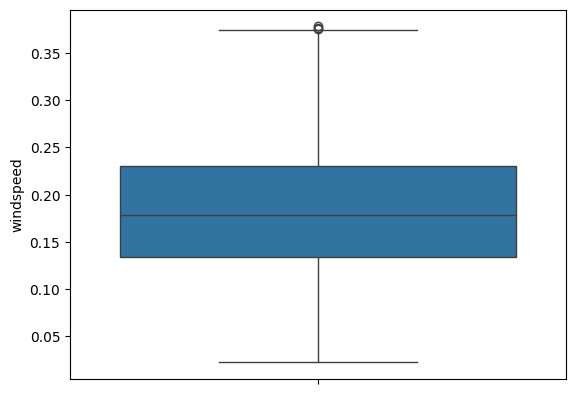

In [ ]:
#Mengecek kembali hasil dari menghapus data pada tabel day_df kolom "windspeed"
sns.boxplot(day_df['windspeed'])
plt.show()

**Insight:**
Tabel day_df mengalami beberapa proses pembersihan data diantaranya:
1.   Terdapat tipe data yang salah pada kolom `dteday` yaitu tipe data object, sehingga tipe datanya perlu diubah menjadi tipe data datetime64[ns].
2.   Terdapat outlier pada kolom `humidity` dan `windspeed` sehingga perlu dibersihkan dengan cara menghapus datanya agar tidak mengganggu proses analisis data.

### Membersihkan tabel `hour_df`

Memperbaiki Tipe Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengatasi Outlier

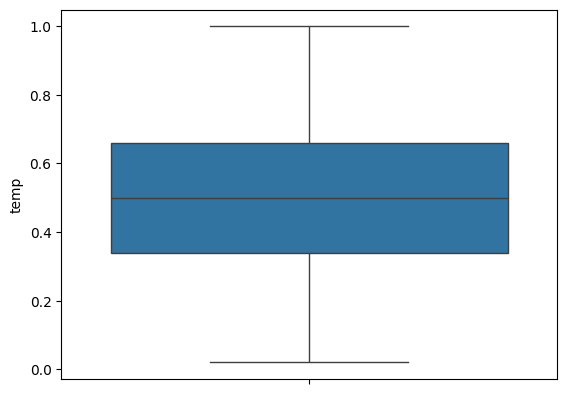

In [ ]:
sns.boxplot(hour_df['temp'])
plt.show()

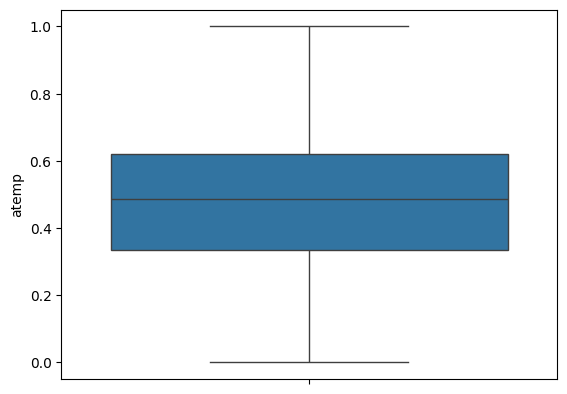

In [ ]:
sns.boxplot(hour_df['atemp'])
plt.show()

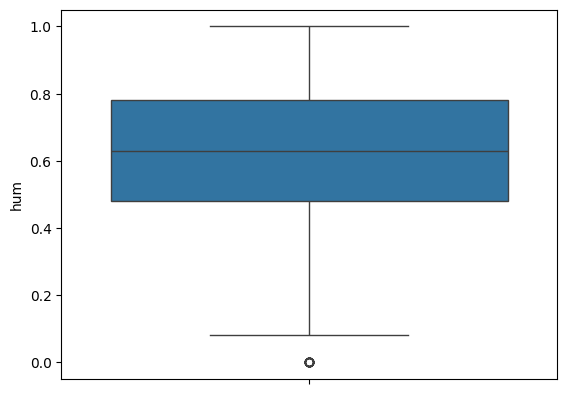

In [ ]:
sns.boxplot(hour_df['hum'])
plt.show()

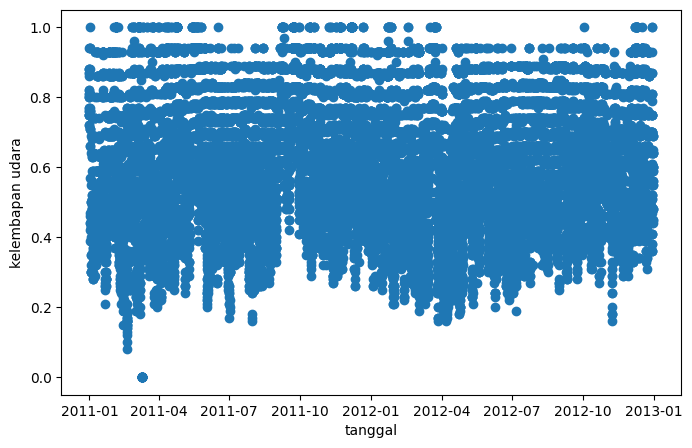

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(hour_df['dteday'], hour_df['hum'])
ax.set_xlabel('tanggal')
ax.set_ylabel('kelembapan udara')
plt.show()

In [ ]:
#Mengecek data outlier pada tabel hour_df kolom "humidity"
hour_df[hour_df.hum <= 0.0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [ ]:
#Total data outlier pada tabel hour_df kolom "windspeed"
jumlah_data_hour_humidity = len(hour_df[hour_df.hum <= 0.0])
print(jumlah_data_hour_humidity)

22


In [ ]:
#Menghapus data outlier pada tabel hour_df kolom "humidity"
hour_df = hour_df.drop(hour_df[hour_df.hum <= 0.0].index)

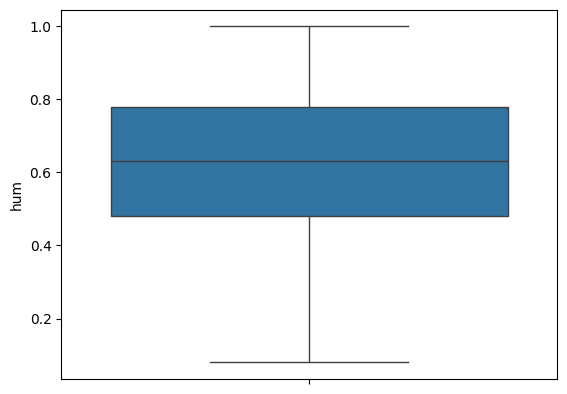

In [ ]:
#Mengecek kembali hasil dari menghapus data pada tabel hour_df kolom "humidity"
sns.boxplot(hour_df['hum'])
plt.show()

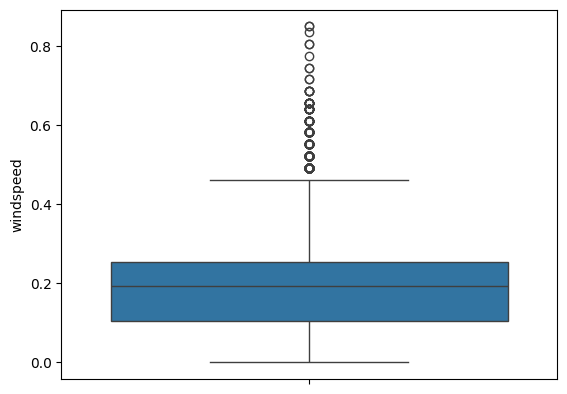

In [ ]:
sns.boxplot(hour_df['windspeed'])
plt.show()

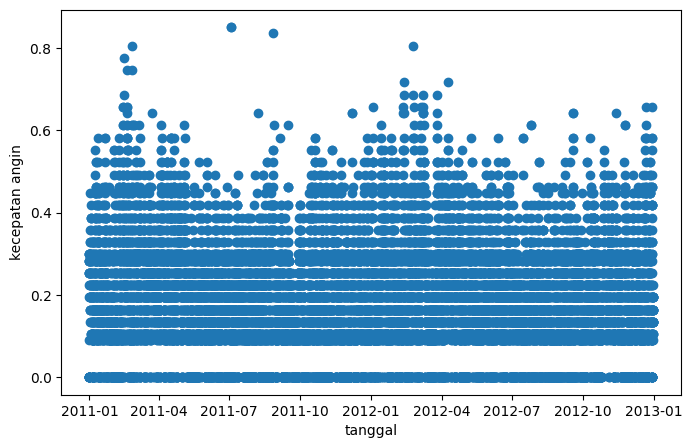

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(hour_df['dteday'], hour_df['windspeed'])
ax.set_xlabel('tanggal')
ax.set_ylabel('kecepatan angin')
plt.show()

In [ ]:
#Mengecek berapa banyak data outlier pada tabel hour_df kolom "windspeed"
jumlah_outlier_hour_windspeed = len(hour_df[hour_df.windspeed >= 0.49])
print('Jumlah outlier pada kolom windspeed:', jumlah_outlier_hour_windspeed)

Jumlah outlier pada kolom windspeed: 341


In [ ]:
#Menghapus data outlier pada tabel hour_df kolom "windspeed"
hour_df = hour_df.drop(hour_df[hour_df.windspeed >= 0.49].index)

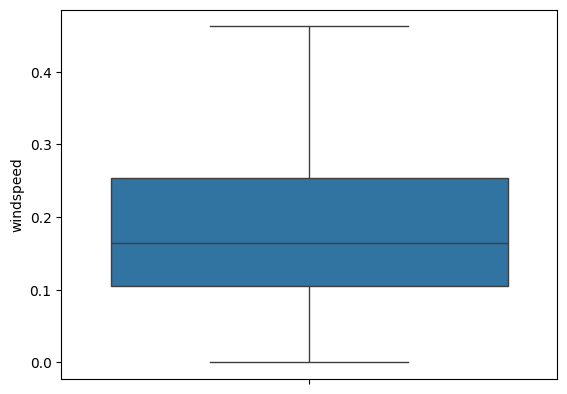

In [ ]:
#Mengecek kembali hasil dari menghapus data pada tabel hour_df kolom "windspeed"
sns.boxplot(hour_df['windspeed'])
plt.show()

**Insight:**
Tabel hour_df mengalami beberapa proses pembersihan data diantaranya:
1.   Terdapat tipe data yang salah pada kolom `dteday` yaitu tipe data object, sehingga tipe datanya perlu diubah menjadi tipe data datetime64[ns].
2.   Terdapat outlier pada kolom `humidity` dan `windspeed` sehingga perlu dibersihkan dengan cara menghapus datanya agar tidak mengganggu proses analisis data.


# Exploratory Data Analysis (EDA)

## Explore `day_df`

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
290,291,2011-10-18,4,0,10,0,2,1,2,0.532500,0.522721,0.701667,0.110087,637,4111,4748
226,227,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
270,271,2011-09-28,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427,3907


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,717.000000,717,717.00000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,366.779637,2012-01-01 18:42:40.669455872,2.51325,0.499303,6.562064,0.029289,2.995816,0.684798,1.396095,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794
min,1.000000,2011-01-01 00:00:00,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,185.000000,2011-07-04 00:00:00,2.00000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000
50%,365.000000,2011-12-31 00:00:00,3.00000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000
75%,550.000000,2012-07-03 00:00:00,3.00000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000
max,731.000000,2012-12-31 00:00:00,4.00000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000
std,210.971354,NaN,1.10555,0.500349,3.439113,0.168732,2.001741,0.464921,0.543511,0.183617,0.163155,0.139222,0.071786,689.273998,1557.676255,1933.542429


In [ ]:
day_df.instant.is_unique

True

In [ ]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

instant casual                              registered        \
        nunique    max min         mean         std        max   min   
weekday                                                                
0           103   3283  54  1353.883495  806.705261       5657   451   
1           102   3065   2   676.931373  498.717112       6435    20   
2           103   1348   9   559.961165  342.241227       6697   573   
3           103   2562   9   555.436893  401.370267       6946   432   
4           101   1405  15   598.584158  372.837827       6781   416   
5           103   2469  38   755.252427  484.835806       6917  1129   
6           102   3410  57  1498.019608  920.067808       5966   570   

                                    cnt                                  
                mean          std   max   min         mean          std  
weekday                                                                  
0        2898.922330  1181.344404  8227   605  4252.805825  1871.478571  
1        3685.000000  1504.385220  7525    22  4361.931373  1795.066756  
2        3977.067961  1539.737476  7767   683  4537.029126  1815.853402  
3        4004.485437  1730.614092  8173   441  4559.922330  2044.736891  
4        4106.316832  1627.352574  7804   431  4704.900990  1924.035709  
5        3936.213592  1502.197701  8362  1167  4691.466019  1883.753142  
6        3126.401961  1352.978923  8714   627  4624.421569  2183.726955

In [ ]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

instant casual                              registered       \
           nunique    max min         mean         std        max  min   
workingday                                                               
0              226   3410  54  1392.066372  869.781766       5966  451   
1              491   2469   2   610.635438  392.400175       6946   20   

                                       cnt                                 
                   mean          std   max  min         mean          std  
workingday                                                                 
0           2980.345133  1293.891026  8714  605  4372.411504  2048.140955  
1           3996.052953  1565.522185  8362   22  4606.688391  1875.995061

In [ ]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "temp": ["min", "max", "mean", "std", ],
    "atemp": ["min", "max", "mean", "std", ],
    "hum": ["min", "max", "mean", "std", ],
    "windspeed": ["min", "max", "mean", "std", ],
})

instant      temp                                   atemp            \
       nunique       min       max      mean       std       min       max   
season                                                                       
1          172  0.059130  0.572500  0.295135  0.101756  0.079070  0.548617   
2          181  0.253043  0.808333  0.545509  0.123043  0.250339  0.757579   
3          188  0.469167  0.861667  0.706309  0.070848  0.242400  0.840896   
4          176  0.220833  0.657500  0.422295  0.108294  0.227913  0.607975   

                                 hum                               windspeed  \
            mean       std       min       max      mean       std       min   
season                                                                         
1       0.295207  0.097682  0.311250  0.948261  0.594315  0.142480  0.045408   
2       0.521307  0.108350  0.254167  0.922500  0.628797  0.152963  0.065929   
3       0.655898  0.072056  0.360000  0.939565  0.633482  0.119349  0.064071   
4       0.414952  0.095920  0.333478  0.972500  0.668757  0.131959  0.022392   

                                      
             max      mean       std  
season                                
1       0.378108  0.204267  0.074433  
2       0.358196  0.200469  0.068167  
3       0.375617  0.172095  0.059526  
4       0.376871  0.169288  0.077921

In [ ]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

instant casual                               registered       \
       nunique    max  min         mean         std        max  min   
season                                                                
1          172   3155    9   338.366279  395.420673       5315  416   
2          181   3410  120  1115.060773  739.473079       6456  674   
3          188   3160  118  1202.611702  595.975032       6917  889   
4          176   3031    2   729.051136  609.121665       6946   20   

                                   cnt                                  
               mean          std   max   min         mean          std  
season                                                                  
1       2265.354651  1190.201465  7836   431  2603.720930  1396.219810  
2       3902.182320  1347.852978  8362   795  5017.243094  1686.861628  
3       4441.691489  1304.626949  8714  1115  5644.303191  1459.800381  
4       4003.670455  1452.289418  8555    22  4732.721591  1708.697284

In [ ]:
# Ekstrak bulan dan buat kolom baru
day_df['month'] = day_df['dteday'].dt.month

# Kelompokkan data berdasarkan bulan
day_df_grouped = day_df.groupby('month')

In [ ]:
#Mengecek kolom yang baru ditambahkan
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
639,640,2012-10-01,4,1,10,0,1,1,2,0.520833,0.512000,0.649167,0.090804,763,6015,6778,10
620,621,2012-09-12,3,1,9,0,3,1,1,0.599167,0.570075,0.577083,0.131846,1050,6820,7870,9
462,463,2012-04-07,2,1,4,0,6,0,1,0.437500,0.426129,0.254167,0.274871,3252,3605,6857,4
32,33,2011-02-02,1,0,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,72,1454,1526,2
451,452,2012-03-27,2,1,3,0,2,1,1,0.323333,0.315654,0.290000,0.187192,531,4571,5102,3


In [ ]:
day_df.groupby(by="month").agg({
    "instant": "nunique",
    "temp": ["min", "max", "mean", "std", ],
    "atemp": ["min", "max", "mean", "std", ],
    "hum": ["min", "max", "mean", "std", ],
    "windspeed": ["min", "max", "mean", "std", ],
})

instant      temp                                   atemp            \
      nunique       min       max      mean       std       min       max   
month                                                                       
1          61  0.059130  0.425000  0.235347  0.083505  0.079070  0.415383   
2          53  0.134783  0.521667  0.298555  0.081468  0.144283  0.511983   
3          58  0.198333  0.601667  0.386899  0.106406  0.200133  0.570067   
4          58  0.300000  0.664167  0.469180  0.087395  0.283454  0.614925   
5          62  0.414167  0.775000  0.594798  0.072999  0.404650  0.725383   
6          60  0.540833  0.834167  0.684097  0.066094  0.525892  0.786613   
7          62  0.595833  0.861667  0.755470  0.051950  0.549912  0.840896   
8          62  0.635833  0.793333  0.708582  0.039913  0.242400  0.751267   
9          60  0.469167  0.753333  0.616485  0.061916  0.461475  0.708983   
10         60  0.254167  0.657500  0.485290  0.085407  0.227913  0.607975   
11         60  0.245833  0.530000  0.369220  0.064527  0.248742  0.524612   
12         61  0.215833  0.475833  0.324985  0.067994  0.220333  0.469054   

                                hum                               windspeed  \
           mean       std       min       max      mean       std       min   
month                                                                         
1      0.239215  0.082624  0.311250  0.911250  0.588164  0.151061  0.073396   
2      0.300709  0.078258  0.314348  0.929167  0.583421  0.135750  0.045408   
3      0.378190  0.102148  0.290000  0.948261  0.604016  0.172746  0.089558   
4      0.456613  0.079596  0.254167  0.888333  0.589922  0.168772  0.065929   
5      0.565662  0.059507  0.360417  0.922500  0.688958  0.118399  0.074637   
6      0.638246  0.055332  0.305000  0.833333  0.575806  0.113837  0.077125   
7      0.704094  0.055027  0.396250  0.865417  0.597876  0.103677  0.080850   
8      0.651475  0.064561  0.415000  0.850000  0.637730  0.100510  0.070283   
9      0.579299  0.052444  0.467083  0.972500  0.714714  0.127677  0.050379   
10     0.472134  0.076032  0.463333  0.906250  0.694706  0.111133  0.022392   
11     0.367359  0.063580  0.333478  0.962500  0.624876  0.128395  0.046650   
12     0.327636  0.066869  0.483333  0.970417  0.669726  0.134167  0.047275   

                                     
            max      mean       std  
month                                
1      0.378108  0.202874  0.075985  
2      0.361950  0.198826  0.068216  
3      0.368167  0.212109  0.066357  
4      0.358196  0.229229  0.072988  
5      0.342667  0.182989  0.063039  
6      0.347642  0.185420  0.061183  
7      0.284813  0.166059  0.043746  
8      0.375617  0.172918  0.064354  
9      0.357587  0.165945  0.066339  
10     0.358200  0.167374  0.076324  
11     0.376871  0.183801  0.085289  
12     0.374383  0.172826  0.083255

In [ ]:
day_df.groupby(by="month").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

instant weathersit                         casual                    \
      nunique        min max      mean       std    max  min         mean   
month                                                                       
1          61          1   3  1.426230  0.531006   1070    9   195.622951   
2          53          1   3  1.396226  0.531313   1435   47   261.000000   
3          58          1   3  1.431034  0.533511   3155  114   735.689655   
4          58          1   3  1.413793  0.563027   3252  120  1032.775862   
5          62          1   2  1.403226  0.494550   3410  255  1214.274194   
6          60          1   2  1.233333  0.426522   2963  477  1231.766667   
7          62          1   3  1.193548  0.437531   3065  562  1260.596774   
8          62          1   2  1.306452  0.464783   2827  226  1161.919355   
9          60          1   3  1.500000  0.596601   3160  118  1172.050000   
10         60          1   3  1.566667  0.647464   3031    2   971.516667   
11         60          1   3  1.350000  0.577106   2290   69   610.050000   
12         61          1   3  1.540984  0.593683   1153    9   352.262295   

                  registered                                   cnt        \
              std        max   min         mean          std   max   min   
month                                                                      
1      198.713207       4185   416  1961.049180  1048.766059  4521   431   
2      236.436526       4546   905  2447.358491  1105.046398  5062  1005   
3      637.601762       5893   491  2933.068966  1484.605800  8362   605   
4      741.594608       5950   674  3522.120690  1410.010428  7460   795   
5      754.950311       6433  2213  4135.500000  1093.179612  8294  2633   
6      664.017647       6456  2993  4540.600000  1012.958885  8120  3767   
7      598.382778       6790  2298  4303.080645  1190.542490  8173  3285   
8      466.576274       6541   889  4502.500000  1335.126601  7865  1115   
9      738.378375       6946  1689  4594.466667  1547.716749  8714  1842   
10     712.084419       6911    20  4256.783333  1708.943048  8156    22   
11     470.933096       5520   935  3637.133333  1219.589045  6852  1495   
12     223.688690       6055   432  3078.672131  1464.080823  6606   441   

                                 
              mean          std  
month                            
1      2156.672131  1160.861372  
2      2708.358491  1163.895335  
3      3668.758621  1889.448628  
4      4554.896552  1760.849672  
5      5349.774194  1298.711561  
6      5772.366667  1240.400031  
7      5563.677419  1273.751871  
8      5664.419355  1494.516146  
9      5766.516667  1810.130649  
10     5228.300000  2015.065590  
11     4247.183333  1285.712709  
12     3430.934426  1547.584320

In [ ]:
day_df.groupby(['month', 'weathersit'])['weathersit'].count()

month  weathersit
1      1             36
       2             24
       3              1
2      1             33
       2             19
       3              1
3      1             34
       2             23
       3              1
4      1             36
       2             20
       3              2
5      1             37
       2             25
6      1             46
       2             14
7      1             51
       2             10
       3              1
8      1             43
       2             19
9      1             33
       2             24
       3              3
10     1             31
       2             24
       3              5
11     1             42
       2             15
       3              3
12     1             31
       2             27
       3              3
Name: weathersit, dtype: int64

In [ ]:
day_df.groupby(['month', 'weathersit'])['cnt'].sum()

month  weathersit
1      1              84015
       2              47036
       3                506
2      1              97239
       2              44135
       3               2169
3      1             129049
       2              82054
       3               1685
4      1             194034
       2              68328
       3               1822
5      1             210838
       2             120848
6      1             278830
       2              67512
7      1             281366
       2              59123
       3               4459
8      1             250921
       2             100273
9      1             222200
       2             117243
       3               6548
10     1             183302
       2             120268
       3              10128
11     1             184625
       2              64017
       3               6189
12     1             110349
       2              95198
       3               3740
Name: cnt, dtype: int64

In [ ]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

instant casual                             registered       \
           nunique    max min        mean         std        max  min   
weathersit                                                              
1              453   3410  15  976.635762  702.059582       6946  416   
2              244   3155   9  689.196721  621.484174       6844  491   
3               20   1264   2  192.450000  265.739579       4324   20   

                                       cnt                                 
                   mean          std   max  min         mean          std  
weathersit                                                                 
1           3938.966887  1527.603264  8714  431  4915.602649  1869.580426  
2           3351.930328  1467.571191  8362  605  4041.127049  1814.024754  
3           1669.850000  1068.384480  4639   22  1862.300000  1241.886981

**Insight:**
Saat proses Exploratory Data Analysis ini, saya mencoba mengeksplorasi dataset `day_df` dengan beberapa hal:
1. Data pada kolom "instant adalah data yang unik.
2. Mengelompokan data berdasarkan kolom "weekday" untuk mencari pengaruhnya terhadap banyaknya sepeda yang tersewa pada kolom "casual", "registered", dan "cnt".
3. Mengelompokan data berdasarkan kolom "workingday" untuk mencari pengaruhnya terhadap banyaknya sepeda yang tersewa pada kolom "casual", "registered", dan "cnt".
3. Mengelompokan data berdasarkan kolom "season" untuk mencari pengaruhnya terhadap kondisi cuaca pada kolom "temp", "atemp", "hum", dan "windspeed" serta terhadap banyaknya sepeda yang tersewa pada kolom "casual", "registered", dan "cnt".
4. Membuat kolom baru bernama "month" dengan cara mengelompokan data pada kolom "dteday" pada bulan yang sama.
5. Mengelompokan data berdasarkan "month" untuk mencari pengaruhnya terhadap kondisi cuaca pada kolom "temp", "atemp", "hum", dan "windspeed" serta terhadap banyaknya sepeda yang tersewa pada kolom "casual", "registered", dan "cnt".
6. Mengelompokan dan menjumlahkan kelompok data kolom "weathersit" dan dihubungan dengan kolom "month" untuk melihat bagaimana kondisi cuaca pada bulan tertentu.

## Explore `hour_df`

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3809,3810,2011-06-12,2,0,6,15,0,0,0,1,0.80,0.7727,0.59,0.2985,142,218,360
853,854,2011-02-08,1,0,2,0,0,2,1,2,0.28,0.3182,0.87,0.0000,4,6,10
5834,5835,2011-09-05,3,0,9,13,1,1,0,2,0.74,0.6970,0.70,0.1343,154,235,389
16366,16367,2012-11-19,4,1,11,16,0,1,1,1,0.42,0.4242,0.58,0.2537,55,325,380
10134,10135,2012-03-03,1,1,3,8,0,6,0,3,0.36,0.3788,0.93,0.0000,2,46,48


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17016.000000,17016,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,8719.636460,2012-01-03 09:56:31.819464192,2.516396,0.502997,6.572873,11.503996,0.028914,2.998002,0.682769,1.422308,0.498235,0.477199,0.630960,0.182814,35.784262,154.048895,189.833157
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4393.750000,2011-07-06 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8697.500000,2012-01-03 00:00:00,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.635000,0.164200,17.000000,116.000000,142.000000
75%,13075.250000,2012-07-03 06:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,48.250000,221.000000,282.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000
std,5009.380243,NaN,1.103448,0.500006,3.427822,6.933561,0.167570,2.005194,0.465412,0.635204,0.192770,0.171556,0.190498,0.112016,49.419374,151.680591,181.762553


In [ ]:
hour_df.instant.is_unique

True

In [ ]:
hour_df["hour group"] = hour_df.hr.apply(lambda x: "After Midnight" if 0 <= x <= 3 else ("Early morning" if 4 <= x <= 7 else ("Morning" if 8 <= x <= 11 else ("Afternoon" if 12 <= x <= 15 else ("Late afternoon" if 16 <= x <= 19 else "Evening")))))

In [ ]:
hour_df["hour group"]

,hour group
0,After Midnight
1,After Midnight
2,After Midnight
3,After Midnight
4,Early morning
...,...
17374,Late afternoon
17375,Evening
17376,Evening
17377,Evening


In [ ]:
hour_df.groupby(by=hour_df["hour group"]).agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ]
})

instant casual                           registered      \
               nunique    max min       mean        std        max min   
hour group                                                               
After Midnight    2836     68   0   6.112835   8.178776        234   0   
Afternoon         2807    362   0  73.680086  69.408243        526   3   
Early morning     2842     40   0   4.542224   6.235929        572   0   
Evening           2857    237   0  25.754988  25.178428        461   2   
Late afternoon    2827    367   0  65.271666  57.338188        886   8   
Morning           2847    268   0  39.949069  39.935848        808   4   

                                        cnt                              
                      mean         std  max min        mean         std  
hour group                                                               
After Midnight   24.723202   28.048394  283   1   30.836037   34.704328  
Afternoon       178.432134   86.336420  776   3  252.112219  146.255347  
Early morning    75.470091  114.552961  596   1   80.012315  118.985247  
Evening         129.648232   82.994084  584   2  155.403220  100.292111  
Late afternoon  315.504068  181.787241  977  11  380.775734  205.975771  
Morning         201.440464  156.311181  839   5  241.389533  166.578696

In [ ]:
hour_df.groupby(by=hour_df["hour group"]).agg({
    "instant": "nunique",
    "temp": ["min", "max", "mean", "std", ],
    "atemp": ["min", "max", "mean", "std", ],
    "hum": ["min", "max", "mean", "std", ],
    "windspeed": ["min", "max", "mean", "std", ],
})

instant  temp                             atemp          \
               nunique   min   max      mean       std     min     max   
hour group                                                               
After Midnight    2836  0.02  0.82  0.459725  0.175147  0.0000  0.8333   
Afternoon         2807  0.06  0.96  0.560819  0.198597  0.1061  1.0000   
Early morning     2842  0.02  0.80  0.439261  0.176761  0.0152  0.8030   
Evening           2857  0.04  0.92  0.492524  0.182040  0.0303  0.8939   
Late afternoon    2827  0.08  1.00  0.547924  0.195173  0.0909  0.9242   
Morning           2847  0.02  0.94  0.490151  0.197705  0.0000  0.9242   

                                     hum                          windspeed  \
                    mean       std   min  max      mean       std       min   
hour group                                                                    
After Midnight  0.444210  0.156431  0.13  1.0  0.712578  0.159052       0.0   
Afternoon       0.530862  0.175212  0.17  1.0  0.512643  0.179462       0.0   
Early morning   0.425967  0.156805  0.15  1.0  0.742090  0.151327       0.0   
Evening         0.474052  0.164296  0.08  1.0  0.643164  0.172905       0.0   
Late afternoon  0.518725  0.172254  0.16  1.0  0.532080  0.189299       0.0   
Morning         0.470214  0.178606  0.23  1.0  0.641317  0.169755       0.0   

                                            
                   max      mean       std  
hour group                                  
After Midnight  0.4627  0.153159  0.105594  
Afternoon       0.4627  0.214362  0.118224  
Early morning   0.4627  0.154128  0.102585  
Evening         0.4627  0.172266  0.104444  
Late afternoon  0.4627  0.216150  0.109426  
Morning         0.4627  0.187372  0.113450

**Insight:**
1. Data pada kolom "instant adalah data yang unik.
2. Mengelompokan data berdasarkan kolom "hr" kedalam beberapa kelompok baru untuk mencari pengaruhnya terhadap kondisi cuaca pada kolom "temp", "atemp", "hum", dan "windspeed" serta terhadap banyaknya sepeda yang tersewa pada kolom "casual", "registered", dan "cnt".

# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana pengaruh hari kerja dan hari libur terhadap minat orang untuk menyewa sepeda?

In [ ]:
workingday_data = day_df.groupby(by="workingday").agg({
    "casual": ["mean", ],
    "registered": ["mean", ],
    "cnt": ["mean", ]
})

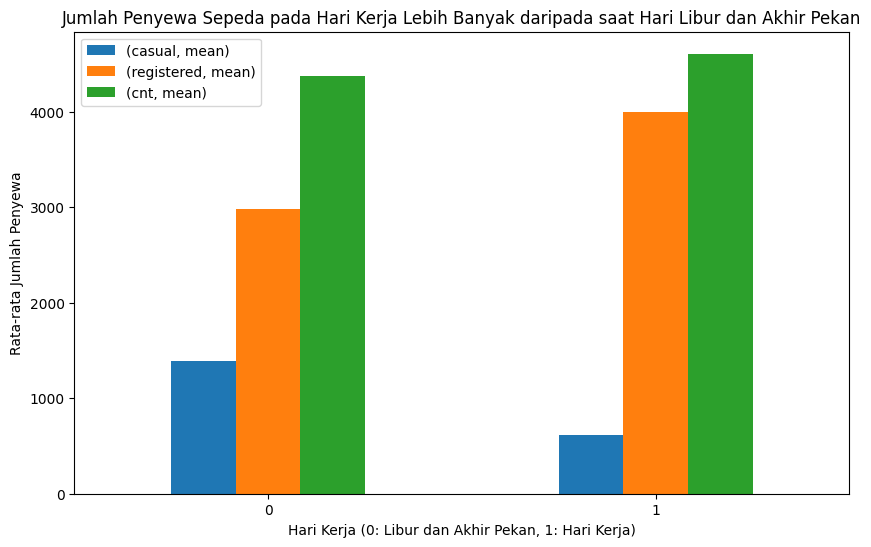

In [ ]:
workingday_data.plot(kind="bar", figsize=(10, 6))
plt.title("Jumlah Penyewa Sepeda pada Hari Kerja Lebih Banyak daripada saat Hari Libur dan Akhir Pekan")
plt.xlabel("Hari Kerja (0: Libur dan Akhir Pekan, 1: Hari Kerja)")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.xticks(rotation=0)  # Rotasi label sumbu x menjadi horizontal
plt.legend(loc="upper left")
plt.show()

**Insight:**
1. Untuk menjawab pertanyaan ini saya melakukan pengelompokan data pada kolom "workingday" dan selanjutnya di cari rata-rata penyewa sepeda baik itu yang "casual", maupun "registered", dan total penyewa dari dua kategori tersebut.

## Pertanyaan 2: Bagaimana pengaruh musim dan bulan terhadap minat pengguna untuk menyewa sepeda?

In [ ]:
season_data = day_df.groupby(by="season").agg({
    "casual": ["mean", ],
    "registered": ["mean", ],
    "cnt": ["mean", ]
})

month_data = day_df.groupby(by="month").agg({
    "cnt": ["mean", ]
})

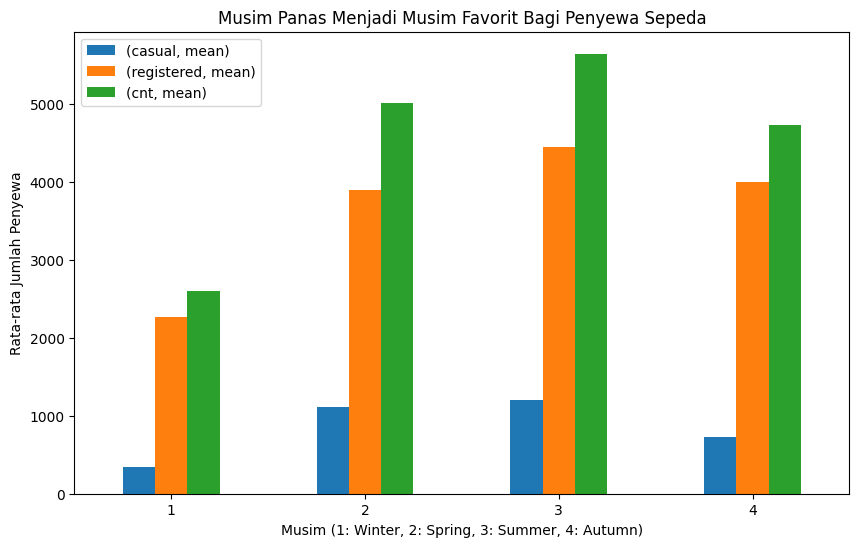

In [ ]:
season_data.plot(kind="bar", figsize=(10, 6))
plt.title("Musim Panas Menjadi Musim Favorit Bagi Penyewa Sepeda")
plt.xlabel("Musim (1: Winter, 2: Spring, 3: Summer, 4: Autumn)")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.xticks(rotation=0)  # Rotasi label sumbu x menjadi horizontal
plt.legend(loc="upper left")
plt.show()

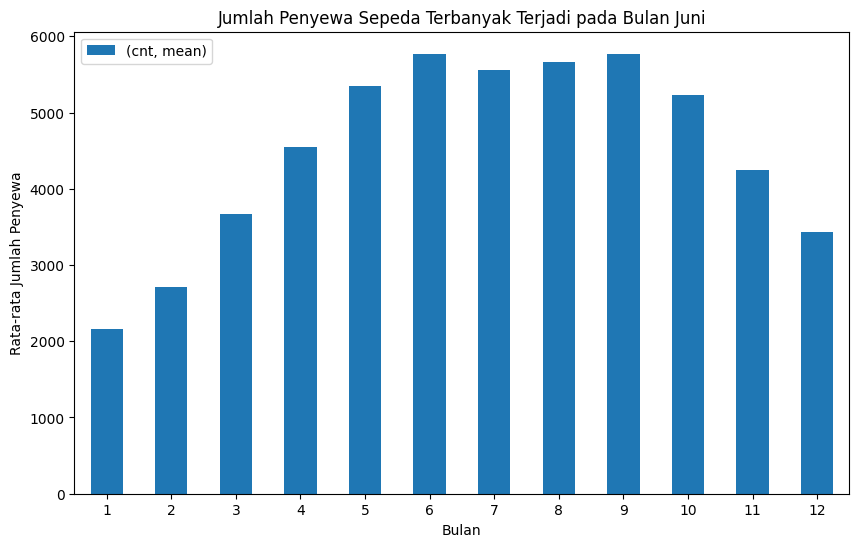

In [ ]:
month_data.plot(kind="bar", figsize=(10, 6))
plt.title("Jumlah Penyewa Sepeda Terbanyak Terjadi pada Bulan Juni")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.xticks(rotation=0)  # Rotasi label sumbu x menjadi horizontal
plt.legend(loc="upper left")
plt.show()

**Insight:**
1. Untuk menjawab pertanyaan ini saya melakukan pengelompokan data pada kolom "Season" dan "Month" dan selanjutnya di cari rata-rata penyewa sepeda baik itu yang "casual", maupun "registered", dan total (cnt) penyewa dari dua kategori tersebut.

## Analisis Lanjutan (Opsional)

## Pertanyaan 3: Bagaimana indikator temperatur udara, humidity dan windspeed mempengaruhi seseorang untuk menyewa sepeda pada jam tertentu?

In [ ]:
hour_df["hour group"] = hour_df.hr.apply(lambda x: "After Midnight" if 0 <= x <= 3 else ("Early morning" if 4 <= x <= 7 else ("Morning" if 8 <= x <= 11 else ("Afternoon" if 12 <= x <= 15 else ("Late afternoon" if 16 <= x <= 19 else "Evening")))))

In [ ]:
hour_df.groupby(by=hour_df["hour group"]).agg({
    "instant": "nunique",
    "temp": ["mean"],
    "atemp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"],
    "cnt": ["mean"]
})

,instant,temp,atemp,hum,windspeed,cnt
,nunique,mean,mean,mean,mean,mean
hour group,,,,,,
After Midnight,2836,0.459725,0.444210,0.712578,0.153159,30.836037
Afternoon,2807,0.560819,0.530862,0.512643,0.214362,252.112219
Early morning,2842,0.439261,0.425967,0.742090,0.154128,80.012315
Evening,2857,0.492524,0.474052,0.643164,0.172266,155.403220
Late afternoon,2827,0.547924,0.518725,0.532080,0.216150,380.775734
Morning,2847,0.490151,0.470214,0.641317,0.187372,241.389533


In [ ]:
hr_data = hour_df.groupby(by=hour_df["hour group"]).agg({
    "temp": ["mean"],
    "atemp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"],
})

hour_data = hour_df.groupby(by=hour_df["hour group"]).agg({
    "cnt": ["mean", ]
})

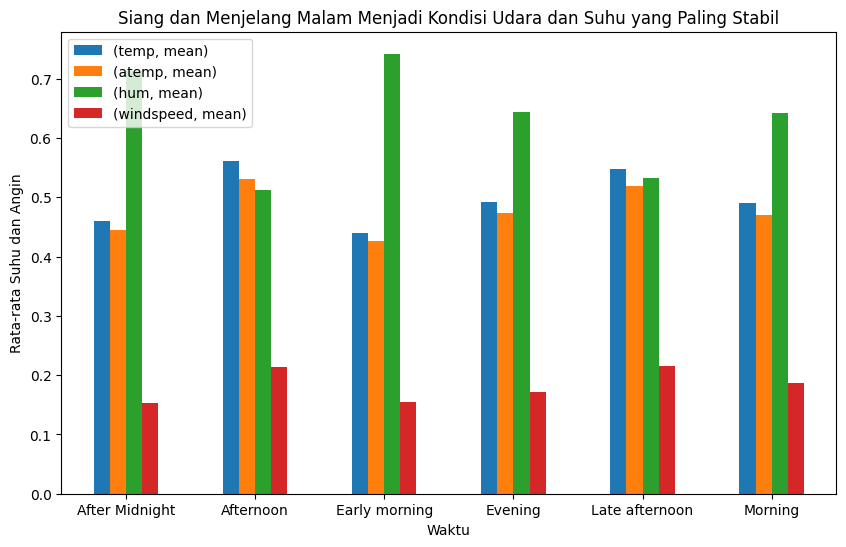

In [ ]:
hr_data.plot(kind="bar", figsize=(10, 6))
plt.title("Siang dan Menjelang Malam Menjadi Kondisi Udara dan Suhu yang Paling Stabil")
plt.xlabel("Waktu")
plt.ylabel("Rata-rata Suhu dan Angin")
plt.xticks(rotation=0)  # Rotasi label sumbu x menjadi horizontal
plt.legend(loc="upper left")
plt.show()

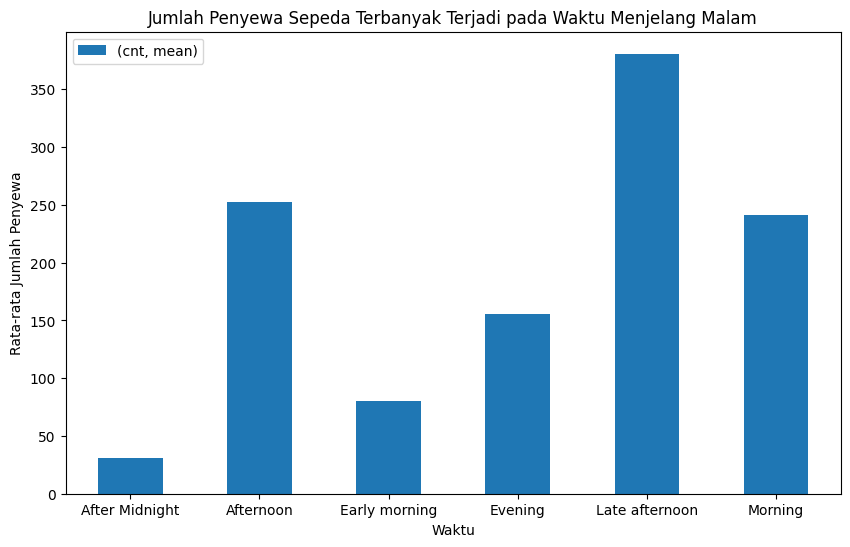

In [ ]:
hour_data.plot(kind="bar", figsize=(10, 6))
plt.title("Jumlah Penyewa Sepeda Terbanyak Terjadi pada Waktu Menjelang Malam")
plt.xlabel("Waktu")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.xticks(rotation=0)  # Rotasi label sumbu x menjadi horizontal
plt.legend(loc="upper left")
plt.show()

**Insight:**
1. Untuk menjawab pertanyaan ini saya melakukan pengelompokan data pada kolom "hr" untuk dijadikan kelompok data yang baru berdasarkan manual clustering dan selanjutnya di cari rata-rata "temp", "atemp", "hum", dan "windspeed" dan rata-rata penyewa sepeda baik itu yang "casual", maupun "registered", dan total (cnt) penyewa dari dua kategori tersebut.

## Conclusion

1. Kesimpulan pertanyaan 1:
    - Berdasarkan bar chart diatas dapat disimpulkan bahwa lebih banyak orang yang menyewa sepeda pada hari kerja secara keseluruhan (cnt) di karenakan mayoritas orang yang menggunakan sepeda untuk bepergian ke sekolah maupun bekerja sudah terdaftar pada aplikasi penyewa sepeda (registered).
    - Sedangkan untuk penyewa sepeda yang hanya menggunakan sepeda secara (casual) lebih banyak menyewa pada hari libur atau akhir pekan karena digunakan untuk jalan-jalan dan bepergian ke tempat wisata.
    
2. Kesimpulan pertanyaan 2:
    - Terdapat kecenderungan pengguna untuk menyewa pada musim panas karena kondisi suhu yang nyaman untuk bersepeda baik itu untuk bekerja dan sekolah maupun jalan-jalan keliling kota.
    - Musim dingin menjadi musim paling sedikit orang menyewa sepeda karena kondisi suhu yang dingin dan berangin. Selain itu, kondisi jalan yang licin membuat orang lebih memilih menggunakan transportasi lain.
    - Dan pada bulan Juni dan September menjadi Bulan paling banyak orang menyewa sepeda dan menggunakannya untuk berbagai aktivitasnya.

3. Kesimpulan pertanyaan 3:
    - Diagram pertama menunjukan adanya kelembapan udara yang sangat tinggi terjadi pada waktu *early morning, morning, evening,* dan *after midnight*.
    - Selain itu pada diagram pertama juga menunjukan adanya kondisi suhu dan udara yang lebih stabil pada waktu *afternoon* dan *late afternoon*.
    - Selanjutnya pada diagram kedua menunjukan bahwa pada waktu *late afternoon* menjadi waktu yang favorit bagi para penyewa sepeda diikuti dengan waktu *morning* dan *afternoon*.
    - Terlihat dari dua diagram tersebut *late afternoon* menjadi waktu yang favorit bagi para penyewa sepeda karena waktu tersebut pada waktu tersebut menjadi waktu dengan kondisi udara yang paling stabil dan bertepatan dengan waktu pulang kerja kantor dan sekolah.

# Mengunduh Notebook

In [ ]:
day_df.to_csv("day_data.csv", index=False)